# 14주차 2강 실습

## 1. 프로야구 연봉 데이터 살펴보기

### [ 프로야구 연봉 데이터셋의 기본 정보 ]

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import csv

warnings.filterwarnings("ignore")

In [74]:
picher_file_path = 'https://github.com/yoonkt200/python-data-analysis/blob/master/data/picher_stats_2017.csv'
batter_file_path = 'https://github.com/yoonkt200/python-data-analysis/blob/master/data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path, sep = '\n', encoding='utf8')
batter = pd.read_csv(batter_file_path, sep = '\n', encoding='utf8')

picher.columns

Index(['<!DOCTYPE html>'], dtype='object')

In [75]:
print(picher.shape)
print(batter.shape)

(4808, 1)
(5591, 1)


In [76]:
picher.head(10)

,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."
1,<head>
2,"<meta charset=""utf-8"">"
3,"<link rel=""dns-prefetch"" href=""https://githu..."
4,"<link rel=""dns-prefetch"" href=""https://avata..."
5,"<link rel=""dns-prefetch"" href=""https://githu..."
6,"<link rel=""dns-prefetch"" href=""https://user-..."
7,"<link crossorigin=""anonymous"" media=""all"" in..."
8,"<link crossorigin=""anonymous"" media=""all"" ..."
9,"<link crossorigin=""anonymous"" media=""all"" ..."


In [77]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   <!DOCTYPE html>  4808 non-null   object
dtypes: object(1)
memory usage: 37.7+ KB


## 2. 예측 대상 Y값 분포 출력하기

In [78]:
picher['연봉(2018)'].describe()

KeyError: '연봉(2018)'

In [79]:
picher['연봉(2018)'].hist(bins = 100)

KeyError: '연봉(2018)'

KeyError: "None of [Index(['연봉(2018)'], dtype='object')] are in the [columns]"

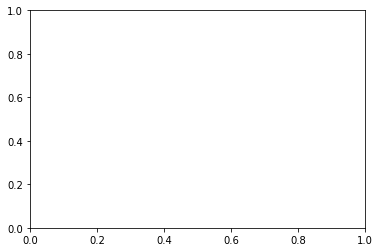

In [80]:
picher.boxplot(column = ['연봉(2018)'])

### [ 회귀 분석에 사용할 피처 살펴보기 ]

In [ ]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 
                             'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

In [ ]:
# 피처 각각에 대한 bistogram을 출력한다.
def plot_hist_each_column(df):
        plt.rcParams['figure.figsize'] = [20, 16]
        fig = plt.figure
        
        # df의 column 갯수 만큼의 subplot을 출력한다.
        for i in range(len(df.columns)):
            ax = fig.add_subplot(5, 5, i+1)
            plt.hist(df[df.columns[i]], bins = 50)
            ax.set_title(df.columns[i])
        plt.show()
plot_hist_each_column(picher_features_df)

# 14주차 3강 실습

## 1. 투수의 연봉 예측하기

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

picher_file_path = 'https://github.com/yoonkt200/python-data-analysis/blob/master/data/picher_stats_2017.csv'
batter_file_path = 'https://github.com/yoonkt200/python-data-analysis/blob/master/data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path, sep = '\n', encoding='utf8')
batter = pd.read_csv(batter_file_path, sep = '\n', encoding='utf8')

### [ 피처들의 단위 맞춰주기 : 피처 스케일링 ]

In [87]:
pd.options.mode.chained_assignment = None

def standard_scailng(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (s-series_mean)/series_std)
    return df

# 피처 각각에 대한 scaling을 수행한다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 
                             'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.renamd(columns = {'연봉(2018)' : 'y'}
picher_df.head(5)

SyntaxError: invalid syntax (<ipython-input-87-f830a7ef3b3d>, line 15)

### [ 피처들의 단위 맞춰주기 : one-hot-encoding ]

In [88]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher.df.join(team_encoding)
team_encoding.head(5)

NameError: name 'picher_df' is not defined

In [89]:
picher_df.head()

NameError: name 'picher_df' is not defined

### [ 회귀 분석 적용하기 ]

#### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [93]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리한다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] 
Y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

NameError: name 'picher_df' is not defined

#### 회귀 분석 계수 학습 & 학습된 계수 출력

In [91]:
lr = linear_model_LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.coef_)

NameError: name 'linear_model_LinearRegression' is not defined

In [94]:
picher_df.columns

NameError: name 'picher_df' is not defined

## 2. 예측 모델 평가하기

In [95]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산한다.
corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start'
             ,'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB',
              'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화한다.
plt.rc('font', family = 'NanumGothicOTF')
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values, cbar=True, annot=True, square=True,
                              fmt='.2f', annot_kws={'size':15},
                              yticklabels=show_cols, xticklabels=show_cols)

plt.tight_layout()
plt.show()

NameError: name 'picher_df' is not defined